<h1> SOCIAL MEDIA ENGAGEMENT ANALYSIS</h1>
<H3>EDA AND ML</H3>

In [1]:
import pandas as pd

Loading the dataset

In [3]:
#Load the data set
df = pd.read_csv('Social Media Engagement Dataset.csv')
df.head()

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8


Data preprocessing

In [4]:
#check for missing values
df.isnull().sum()

,0
post_id,0
timestamp,0
day_of_week,0
platform,0
user_id,0
location,0
language,0
text_content,0
hashtags,0
mentions,3941


In [5]:
#drop missing values
df.dropna(subset=['engagement_rate'], inplace=True)
#fill other missing values
df.fillna('' , inplace=True)

In [6]:
#convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:
#encode categorical columns
categorical_cols = ['day_of_week', 'platform', 'location', 'language', 'topic_category',
                    'sentiment_label', 'emotion_type', 'brand_name', 'product_name',
                    'campaign_name', 'campaign_phase']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [8]:
#drop non-numeric and text-heavy columns
df_encoded.drop(columns=['post_id', 'user_id', 'text_content', 'hashtags', 'mentions',
                         'keywords', 'timestamp'], inplace=True)

In [9]:
x = df_encoded.drop(columns=['engagement_rate'])
y = df_encoded['engagement_rate']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [12]:
#Random Forest Algorithm
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.017294647115582016
R2 Score: 0.9863116062121566


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

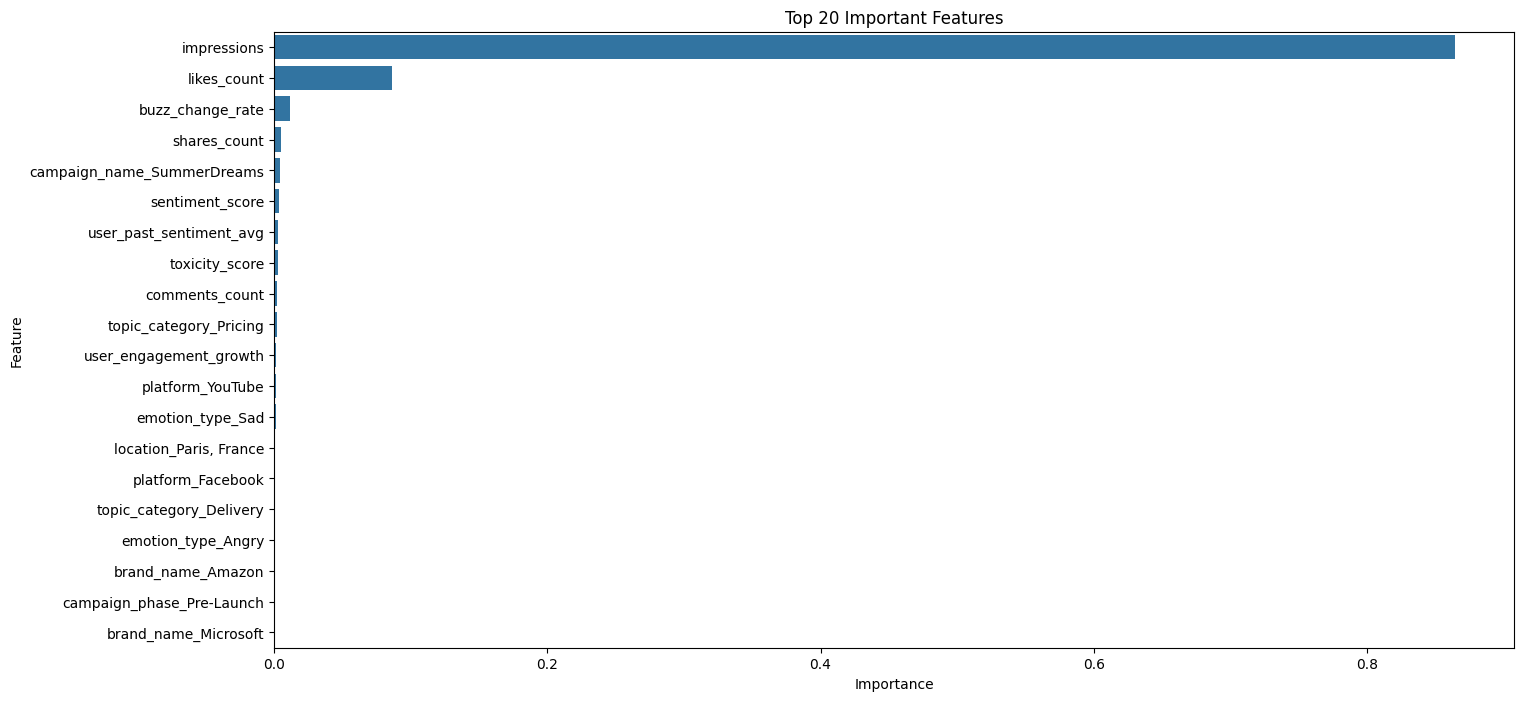

In [15]:
importances = model.feature_importances_
features = x.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(20))
plt.title('Top 20 Important Features')
plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Limit to top 500 features to avoid overfitting
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text_content'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())


In [17]:
X_final = pd.concat([df_encoded.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
X_final.drop(columns=['engagement_rate'], inplace=True)

Visualize predictions

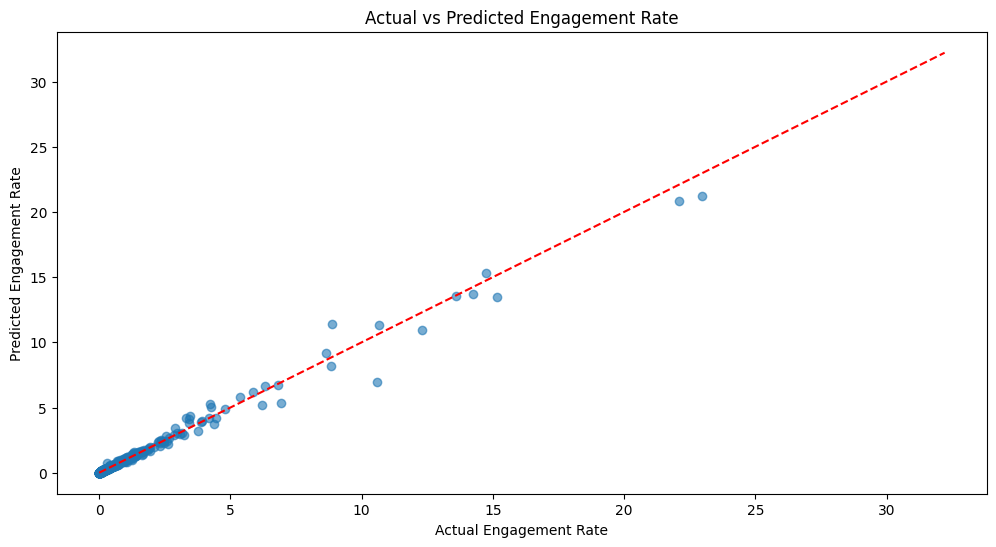

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Engagement Rate')
plt.ylabel('Predicted Engagement Rate')
plt.title('Actual vs Predicted Engagement Rate')
plt.show()

Mock dataframe for structure

In [31]:
#create a mock dataframe for structure
import numpy as np
import pandas as pd
np.random.seed(42)
df = pd.DataFrame({
    'timestamp' : pd.date_range(start='2023-01-01', periods=100, freq='h'),
    'day_of_week' : np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 100),
    'text_content' : np.random.choice(["Win a free iphone!", "Check out our new product", "Happy Holidays everyone!",
                                       "Big discounts available now"], 100),
    'hashtags' : np.random.choice(["#sale,#discount","#win,#giveaway","#holiday", ""], 100),
    'mentions' : np.random.choice(["@user1", "@user2", "@brand", "", "influencer"], 100),
    'toxicity_score' : np.random.rand(100),
    'sentiment_score' : np.random.rand(100),
    'engagement_rate' : np.random.rand(100)
})

Feature Engineering

In [32]:
#convert tomestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df['month'] = df['timestamp'].dt.month

In [33]:
#text features
df['text_length'] = df['text_content'].apply(len)
df['word_count'] = df['text_content'].apply(lambda x: len(x.split()))

In [34]:
#hashtag and mention features
df['hashtag_count'] = df['hashtags'].apply(lambda x: len(str(x).split(',')) if x else 0)
df['mention_count'] = df['mentions'].apply(lambda x: len(str(x).split(',')) if x else 0)

In [35]:
#sentiment-toxicity interaction
df['sentiment_toxicity'] = df['sentiment_score'] * df['toxicity_score']

Visualizations

<ipython-input-45-1df2fca252bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='engagement_rate', data=df, ax=axes[0, 0], palette="Set3")


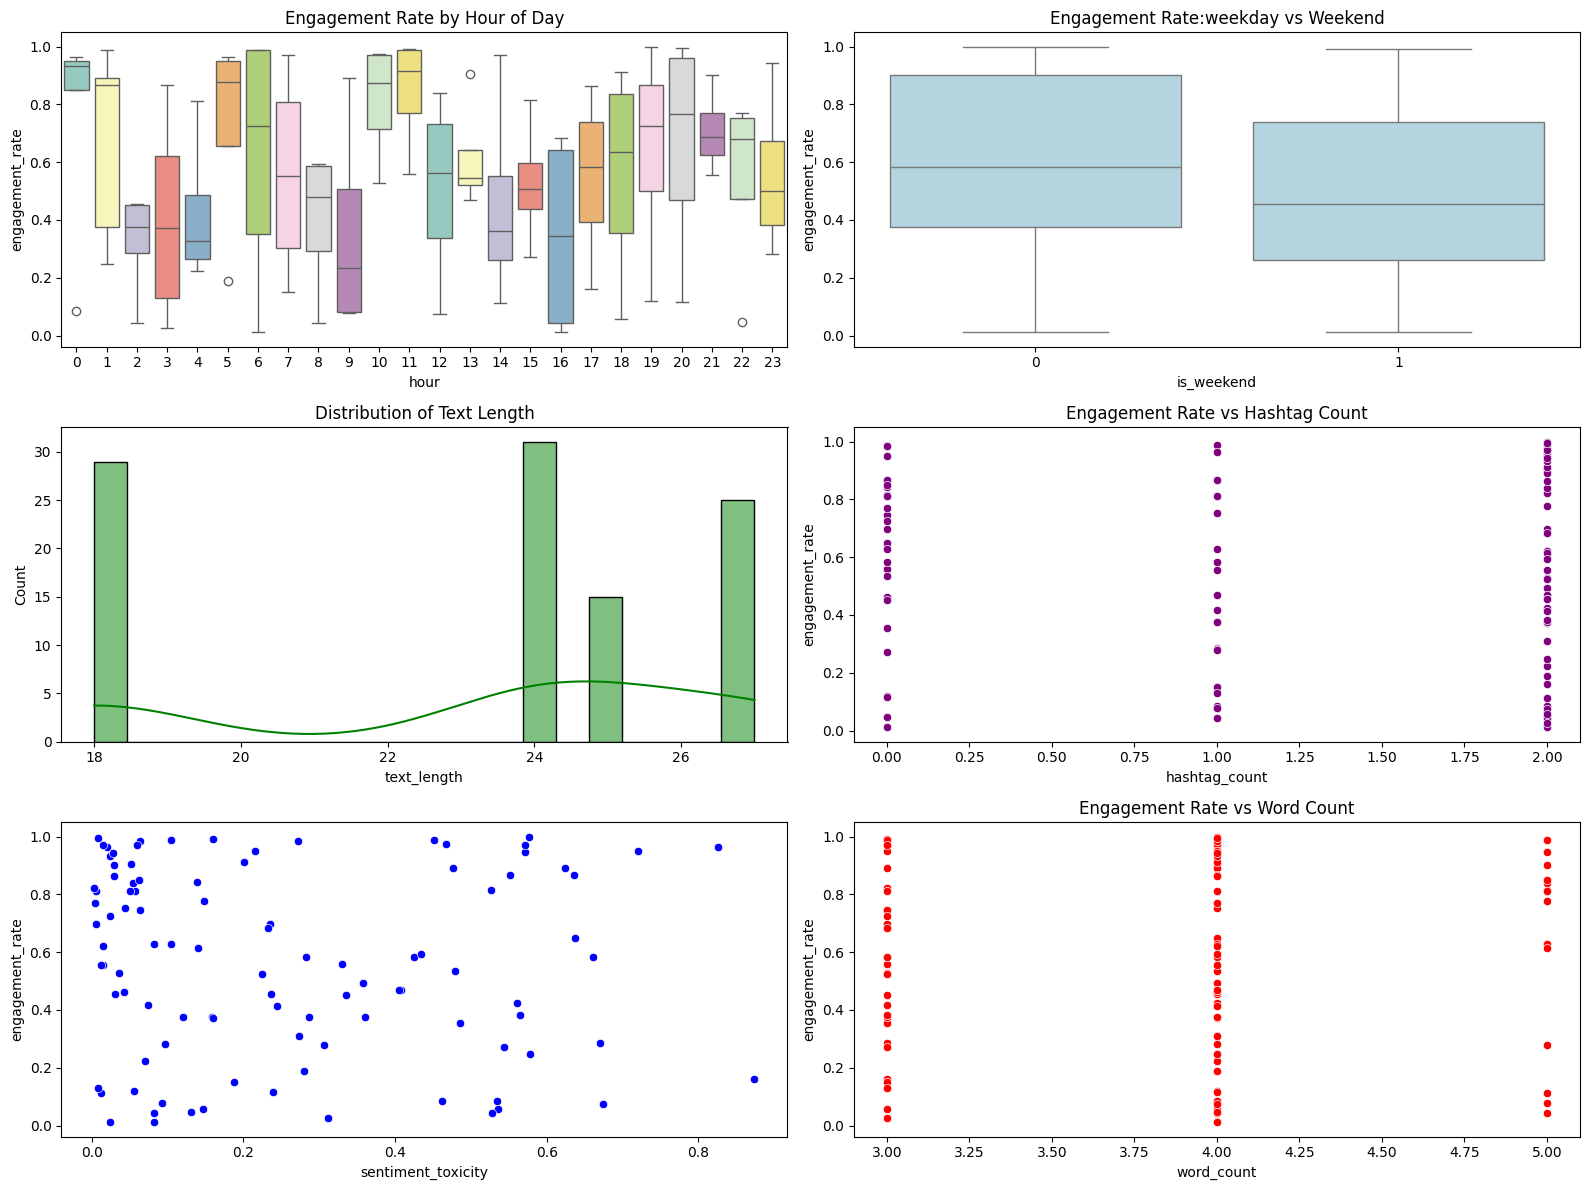

In [45]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
#1. Boxplot - hour of day
sns.boxplot(x='hour', y='engagement_rate', data=df, ax=axes[0, 0], palette="Set3")
axes[0, 0].set_title('Engagement Rate by Hour of Day')

#2. Boxplot - weekend
sns.boxplot(x='is_weekend', y='engagement_rate', data=df, ax=axes[0, 1], color="lightblue")
axes[0, 1].set_title('Engagement Rate:weekday vs Weekend')

#3. Histogram - text length
sns.histplot(df['text_length'], bins=20, kde=True, ax=axes[1, 0], color="green")
axes[1, 0].set_title('Distribution of Text Length')

#4. scatterplot - hashtag count
sns.scatterplot(x='hashtag_count', y='engagement_rate', data=df, ax=axes[1, 1], color="purple")
axes[1, 1].set_title('Engagement Rate vs Hashtag Count')

#5. scatterplot - sentiment x toxicity
sns.scatterplot(x='sentiment_toxicity' ,y='engagement_rate', data=df, ax=axes[2, 0], color="blue")
axes[2, 1].set_title('Engagement Rate vs Sentiment x Toxicity')

#6. scatterplot - word count
sns.scatterplot(x='word_count', y='engagement_rate', data=df, ax=axes[2, 1], color="red")
axes[2, 1].set_title('Engagement Rate vs Word Count')

plt.tight_layout()
plt.show()